# 第十四讲 聚类


# 1、层次聚类

In [1]:
#导入相应的包
import scipy
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
#导入数据
orgData = pd.read_csv('cities_10.csv', index_col="AREA", encoding='gbk')
orgData.head()
#orgData.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
AREA,,,,,,,,,
辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7


In [3]:
#标准化
x_scaled = preprocessing.scale(orgData+0.0)#归一化，但是只能用于浮点类型变量
pd.DataFrame(x_scaled).head()

,0,1,2,3,4,5,6,7,8
0,-0.375748,-0.335897,-0.570700,-0.331801,-0.435115,-0.686087,-0.138827,-0.449589,-0.360085
1,1.199240,-0.483152,1.144732,0.984558,0.799910,0.865054,0.664019,-0.278096,0.349766
2,-0.184465,-0.764857,-0.546094,-0.468842,-0.631008,-0.491085,-0.391025,-0.602244,-0.688539
3,-1.438442,0.648116,-1.017166,-1.404990,-1.212338,-1.164573,-1.283762,-0.465286,-1.128613
4,1.225934,-0.184302,1.172001,1.080603,0.839647,1.067215,0.693490,0.062534,0.462736


In [4]:
#变量压缩
pca=PCA(n_components=2)
newData=pca.fit_transform(x_scaled)
pca.explained_variance_ratio_ 

array([ 0.80112955,  0.12214932])

In [5]:
newData

array([[-1.18945132, -0.31092235],
       [ 2.06415695, -0.74854414],
       [-1.43769023, -0.80669682],
       [-3.23039706,  0.84519783],
       [ 2.36892693, -0.44480961],
       [ 0.28997221,  2.79266758],
       [ 1.2099519 , -0.00638496],
       [-2.09689459, -0.22796377],
       [ 5.50091159, -0.14275827],
       [-3.47948639, -0.94978548]])

In [6]:
#1. 层次聚类
#生成点与点之间的距离矩阵,这里用的欧氏距离:
disMat = sch.distance.pdist(newData,'euclidean') 
#进行层次聚类:
Z=sch.linkage(disMat,method='average') 
#将层级聚类结果以树状图表示出来并保存为plot_dendrogram.png
P=sch.dendrogram(Z)
plt.savefig('plot_dendrogram1.png')


# 2、K-means聚类

In [26]:
import numpy as np
from sklearn import cluster
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
iris = pd.read_csv('iris.csv')
x=iris.ix[:,"Sepal.Length":"Petal.Width"]
y=iris["Species"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


归一化的使用说明 http://www.cnblogs.com/chaosimple/p/4153167.html

In [16]:
x_scaled = preprocessing.scale(x+0.0)#归一化，但是只能用于浮点类型变量
pd.DataFrame(x_scaled).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [17]:
pca=PCA(n_components=3)
newData=pca.fit_transform(x_scaled)
pca.explained_variance_ratio_ 

array([ 0.72962445,  0.22850762,  0.03668922])

In [18]:
score=pd.DataFrame(newData)
score.head()

,0,1,2
0,-2.264703,0.480027,-0.127706
1,-2.080961,-0.674134,-0.234609
2,-2.364229,-0.341908,0.044201
3,-2.299384,-0.597395,0.091290
4,-2.389842,0.646835,0.015738


http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [21]:
from sklearn.cluster import KMeans

In [23]:
kmeans = cluster.KMeans(n_clusters=3) #MiniBatchKMeans()分批处理
#kmeans = cluster.KMeans(n_clusters=3, init='random', n_init=1)
result=kmeans.fit(x_scaled)
print(result)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [24]:
result.labels_ 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

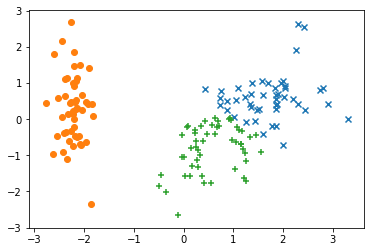

In [25]:
lo = plt.scatter(score[0][result.labels_==0],score[1][result.labels_==0], marker='x')
lo = plt.scatter(score[0][result.labels_==1],score[1][result.labels_==1], marker='o')
lo = plt.scatter(score[0][result.labels_==2],score[1][result.labels_==2], marker='+')

## 聚类效果评估

### Silhouette Coefficient

http://scikit-learn.org/stable/modules/clustering.html#clustering

In [31]:
from sklearn import metrics
metrics.silhouette_score(x_scaled, result.labels_, metric='euclidean')

0.45994823920518646

### Adjusted Rand index

http://scikit-learn.org/stable/modules/clustering.html#clustering

In [33]:
from sklearn import metrics
metrics.adjusted_rand_score(y, result.labels_ )

0.6201351808870379

## 练习

使用“profile_telecom”数据集进行聚类